### 1. Image Filtering

#### 1-1. Thresholding

In [1]:
import PIL

In [2]:
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img = Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/06/filtering.png')

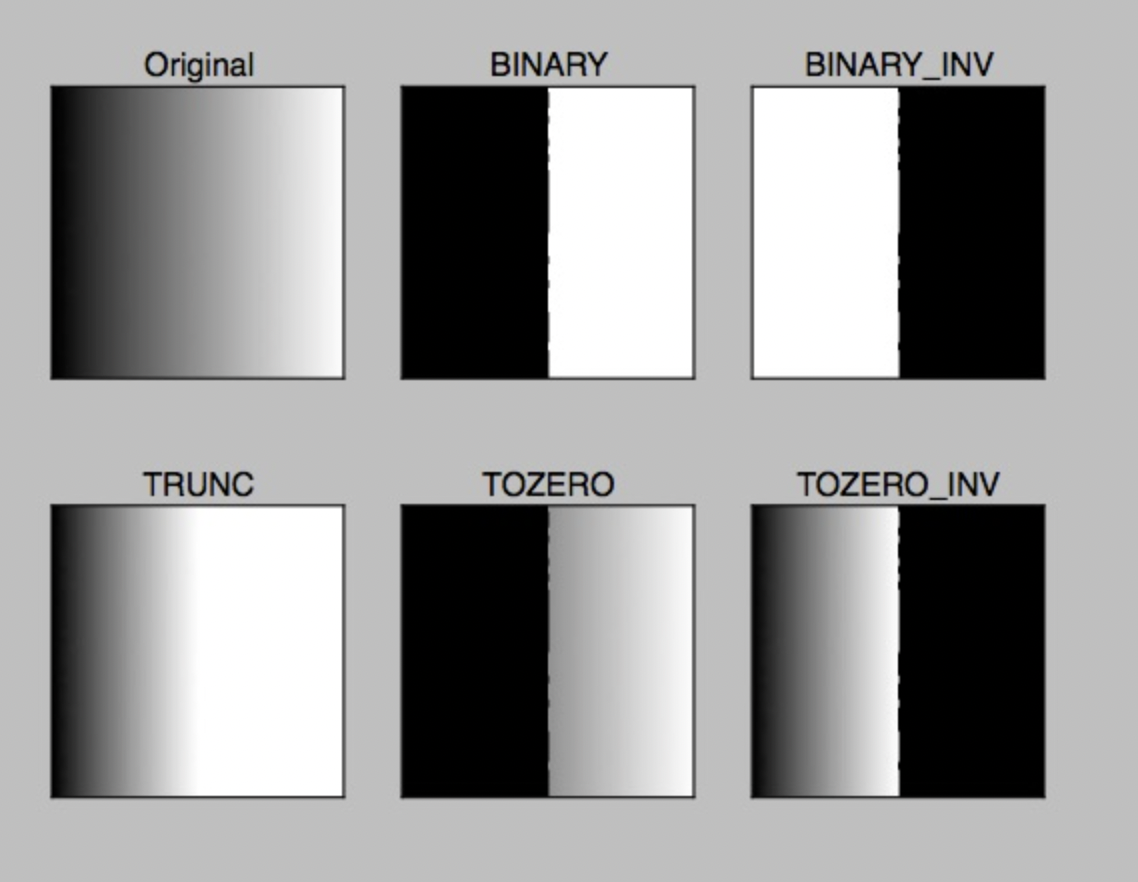

In [5]:
img

In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage.data import coins
# 동전 이미지

In [7]:
img = coins()

In [8]:
maxval = 255
# 기준값을 넘었을때 적용할 최대값
thresh = maxval / 2 
# 기준값

In [9]:
thresh

127.5

In [10]:
img

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

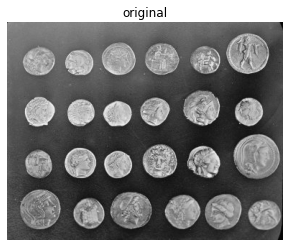

In [11]:
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('original')
plt.show()

In [12]:
_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
# 기준값, 변경된 이미지
# 기준값을 넘으면 최대값 아니면 0

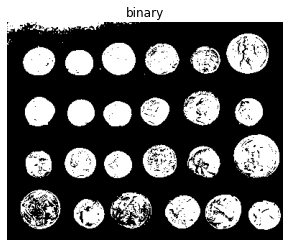

In [13]:
plt.imshow(thresh1, 'gray')
plt.axis('off')
plt.title('binary')
plt.show()

In [14]:
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
# 기준값을 넘으면 0 아니면 최대값

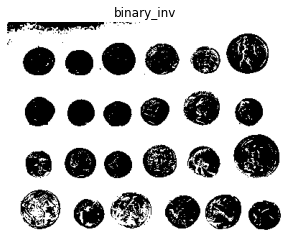

In [15]:
plt.imshow(thresh2, 'gray')
plt.axis('off')
plt.title('binary_inv')
plt.show()

In [16]:
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
# 기준값을 넘으면 기준값 아니면 최대값

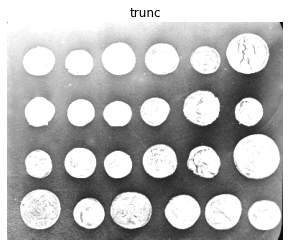

In [17]:
plt.imshow(thresh3, 'gray')
plt.axis('off')
plt.title('trunc')
plt.show()

In [18]:
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
# 기준값을 넘으면 원래값 아니면 0

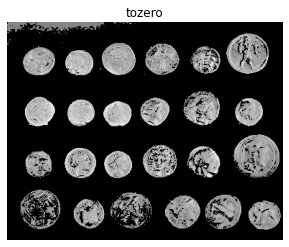

In [19]:
plt.imshow(thresh4, 'gray')
plt.axis('off')
plt.title('tozero')
plt.show()

In [20]:
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)
# 기준값을 넘으면 0 아니면 원래값

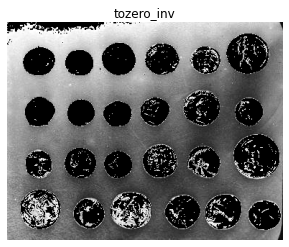

In [21]:
plt.imshow(thresh5, 'gray')
plt.axis('off')
plt.title('tozero_inv')
plt.show()

#### 1-2. AdaptiveThreshold

* 일정한 영역내의 이웃한 픽셀의 값을 이용하여 해당 영역에 기준값을 자체적으로 계산

In [22]:
from skimage.data import page

In [23]:
img = page()

In [24]:
maxval = 255
thresh = 126

In [25]:
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
# 기본적인 임계값 처리

In [26]:
k = 15
# blocksize : 주변 값들의 범위 홀수로 지정
C = 20
# 가중 평균에서 뺄 값.

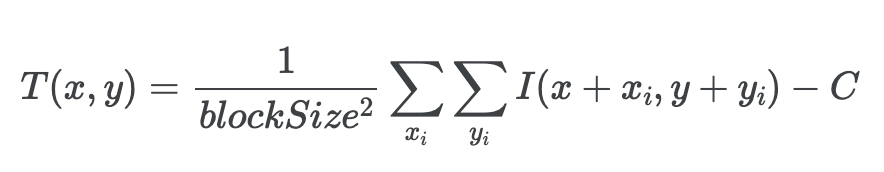

In [27]:
adfr = Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/06/adfr.png')
adfr

In [28]:
th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
# blocksize 영역의 픽셀의 평균값으로 결정

In [29]:
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)
# adaptiveThreshold + Gaussian

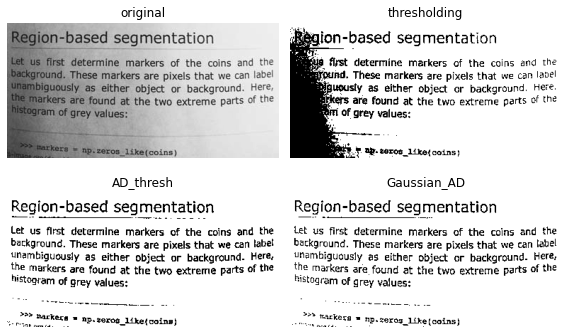

In [30]:
images = [img, th1, th2, th3]
titles = ['original', 'thresholding', 'AD_thresh', 'Gaussian_AD']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 1-3. Otsu's binarization method

* 임의로 임계값을 정해 픽셀을 두 분류로 나누고 명암 분포를 구하는 작업을 반복하여 명암 분포가 가장 균일할 때의 임계값을 t로 선택

In [31]:
img = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/06/sc_img.png', cv2.IMREAD_GRAYSCALE)

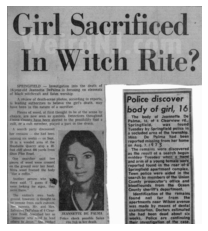

In [32]:
plt.imshow(img, 'gray')
plt.axis('off')
plt.show()

In [33]:
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 

In [34]:
t

134.0

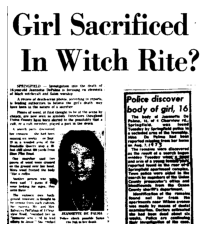

In [35]:
plt.imshow(t_otsu, 'gray')
plt.axis('off')
plt.show()

### Custom Dataset 적용

In [36]:
img = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/06/cs_data.png', cv2.IMREAD_GRAYSCALE)

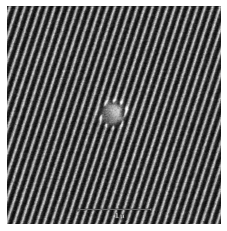

In [37]:
plt.imshow(img, 'gray')
plt.axis('off')
plt.show()

In [38]:
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 

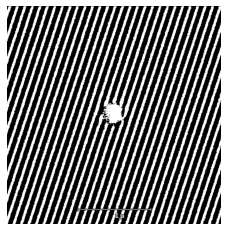

In [39]:
plt.imshow(t_otsu, 'gray')
plt.axis('off')
plt.show()

### 2.filter

In [40]:
img_pro = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/06/professor.jpeg')

In [41]:
img_pro = cv2.cvtColor(img_pro, cv2.COLOR_BGR2RGB)

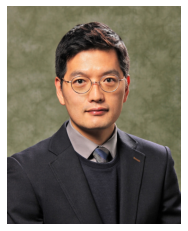

In [42]:
plt.imshow(img_pro)
plt.axis('off')
plt.show()

In [43]:
img.shape

(956, 938)

In [44]:
img_pro_crop = img_pro[0:1200, 0:1200]
img_pro_crop = cv2.resize(img_pro_crop, dsize=(420, 420))

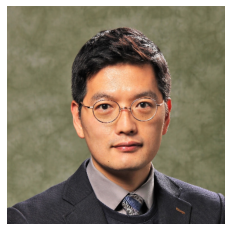

In [45]:
plt.imshow(img_pro_crop)
plt.axis('off')
plt.show()

In [46]:
import numpy as np

#### 2-1. mean kernel

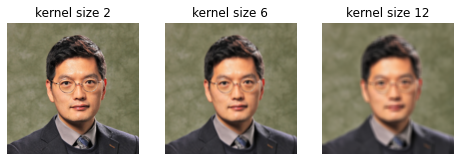

In [47]:
plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 12]):
    kernel = np.ones((k, k)) / k**2
    # 평균 커널
    filtering = cv2.filter2D(img_pro_crop, -1, kernel)
    # 입력 이미지, 입력 이미지와 동일한 데이터 출력, kernel 적용
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("kernel size {}".format(k))
    plt.axis("off")
plt.show()

### 3. Blur

#### 3-1.Mean Blur

In [48]:
blur = cv2.blur(img_pro_crop, (5, 5))
# (5, 5)범위내의 평균값으로 변경하는 blur
boxfilter = cv2.boxFilter(img_pro_crop, -1, (5, 5))
# 위와 동일하게 blur를 적용하는 방법

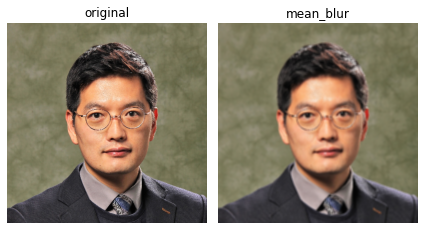

In [49]:
plt.subplot(1, 2, 1)
plt.imshow(img_pro_crop)
plt.title("original")
plt.axis('off')
plt.subplot(1, 2, 2)


plt.imshow(blur)
plt.title("mean_blur")
plt.axis('off')
plt.tight_layout()
plt.show()

#### 3-2. Median Blur

In [50]:
img_noise = img_pro_crop.copy()

* Noise 입력

In [51]:
np.random.seed(0)
N = 15000

In [52]:
np.random.randint(img_pro_crop.shape[0], size=N)

array([172,  47, 117, ..., 119,  12,  28])

In [53]:
idx1 = np.random.randint(img_pro_crop.shape[0], size=N)
# 해당 인덱스 값을 노이즈로 선택
idx2 = np.random.randint(img_pro_crop.shape[1], size=N)
img_noise[idx1, idx2] = 255
# 위에서 선택한 인덱스에 해당하는 값을 255로 고정

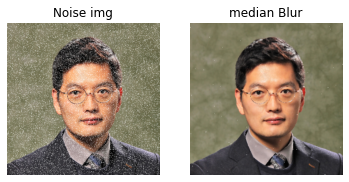

In [54]:
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("Noise img")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("median Blur")
plt.axis('off')
plt.show()

→ 어느정도 개선된 것을 확인할 수 있다.

#### 3-3.Gaussian Blur

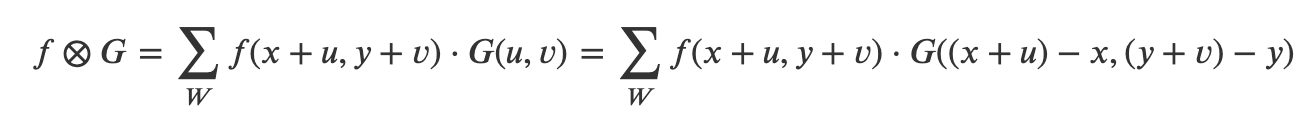

In [55]:
g_blr = Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/06/G_blr.png')
g_blr

In [56]:
import matplotlib as mpl

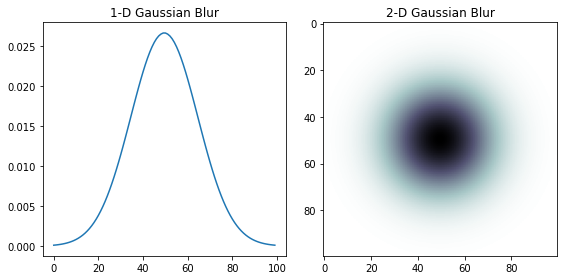

In [57]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1-D Gaussian Blur")

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("2-D Gaussian Blur")

plt.tight_layout()
plt.show()

In [58]:
img_noise = np.clip((img_pro_crop / 255 + np.random.normal(scale=0.15, size=img_pro_crop.shape)) * 255, 0, 255).astype('uint8')
# 백색잡음

In [59]:
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)
# Gaussian Blur 적용

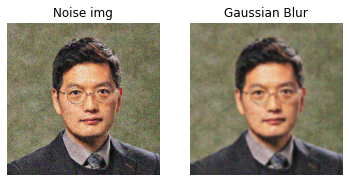

In [60]:
plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("Noise img")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("Gaussian Blur")
plt.axis('off')

plt.show()

#### 3-4.Bilateral Filtering

* 가우시안을 사용하였을 때 이미지의 경계선이 흐려지는 문제 발생. 두 픽셀의 거리, 명암값의 차이도 커널에 반영

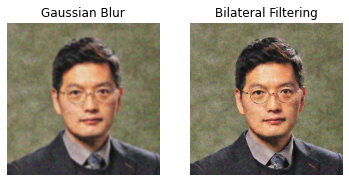

In [61]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)
# (원본이미지, 커널크기, 색공간 표준편차, 거리공간 표준편차 - 근방의 크기)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("Bilateral Filtering")
plt.axis('off')

plt.show()